# Capítulo 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 400 


In [2]:
df = pd.read_excel('./data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# TRATAMENTO DE DADOS:

### A primeira seleção dos dados duplicados será aplicada sobre a duplicidade dos ID´s.

In [7]:
df['ID'].nunique()

29687

In [8]:
id_counts = df['ID'].value_counts()
id_counts.head(10000)

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
                ..
95cdd3e7-4f24    1
99d1fa0e-222b    1
ecff42d0-bdc6    1
67697c15-2247    1
62c53ee3-f0cf    1
Name: ID, Length: 10000, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [10]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [11]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [12]:
dupe_ids = id_counts.index[dupe_mask]

In [13]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

#### Abaixo temos uma seleção realizada com as linhas ID´s em duplicidade e podemos observar que uma das linhas está com os dados completamente zerados.

In [14]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(12)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Agora iremos verificar de outra forma. Iremos procurar linhas com dados zerados em todo o dataframe.

In [15]:
df_zero_mask = df == 0

In [16]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [17]:
sum(feature_zero_mask)

315

In [18]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [19]:
df_clean_1.shape

(29685, 25)

In [20]:
df_clean_1['ID'].nunique()

29685

## Explorando e Limpando os dados:

In [21]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [22]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [23]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [24]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [25]:
sum(valid_pay_1_mask)

26664

In [26]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [27]:
df_clean_2.shape

(26664, 25)

In [28]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## Explorando o limite de crédito e as características demográficas:

array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'AGE'}>]], dtype=object)

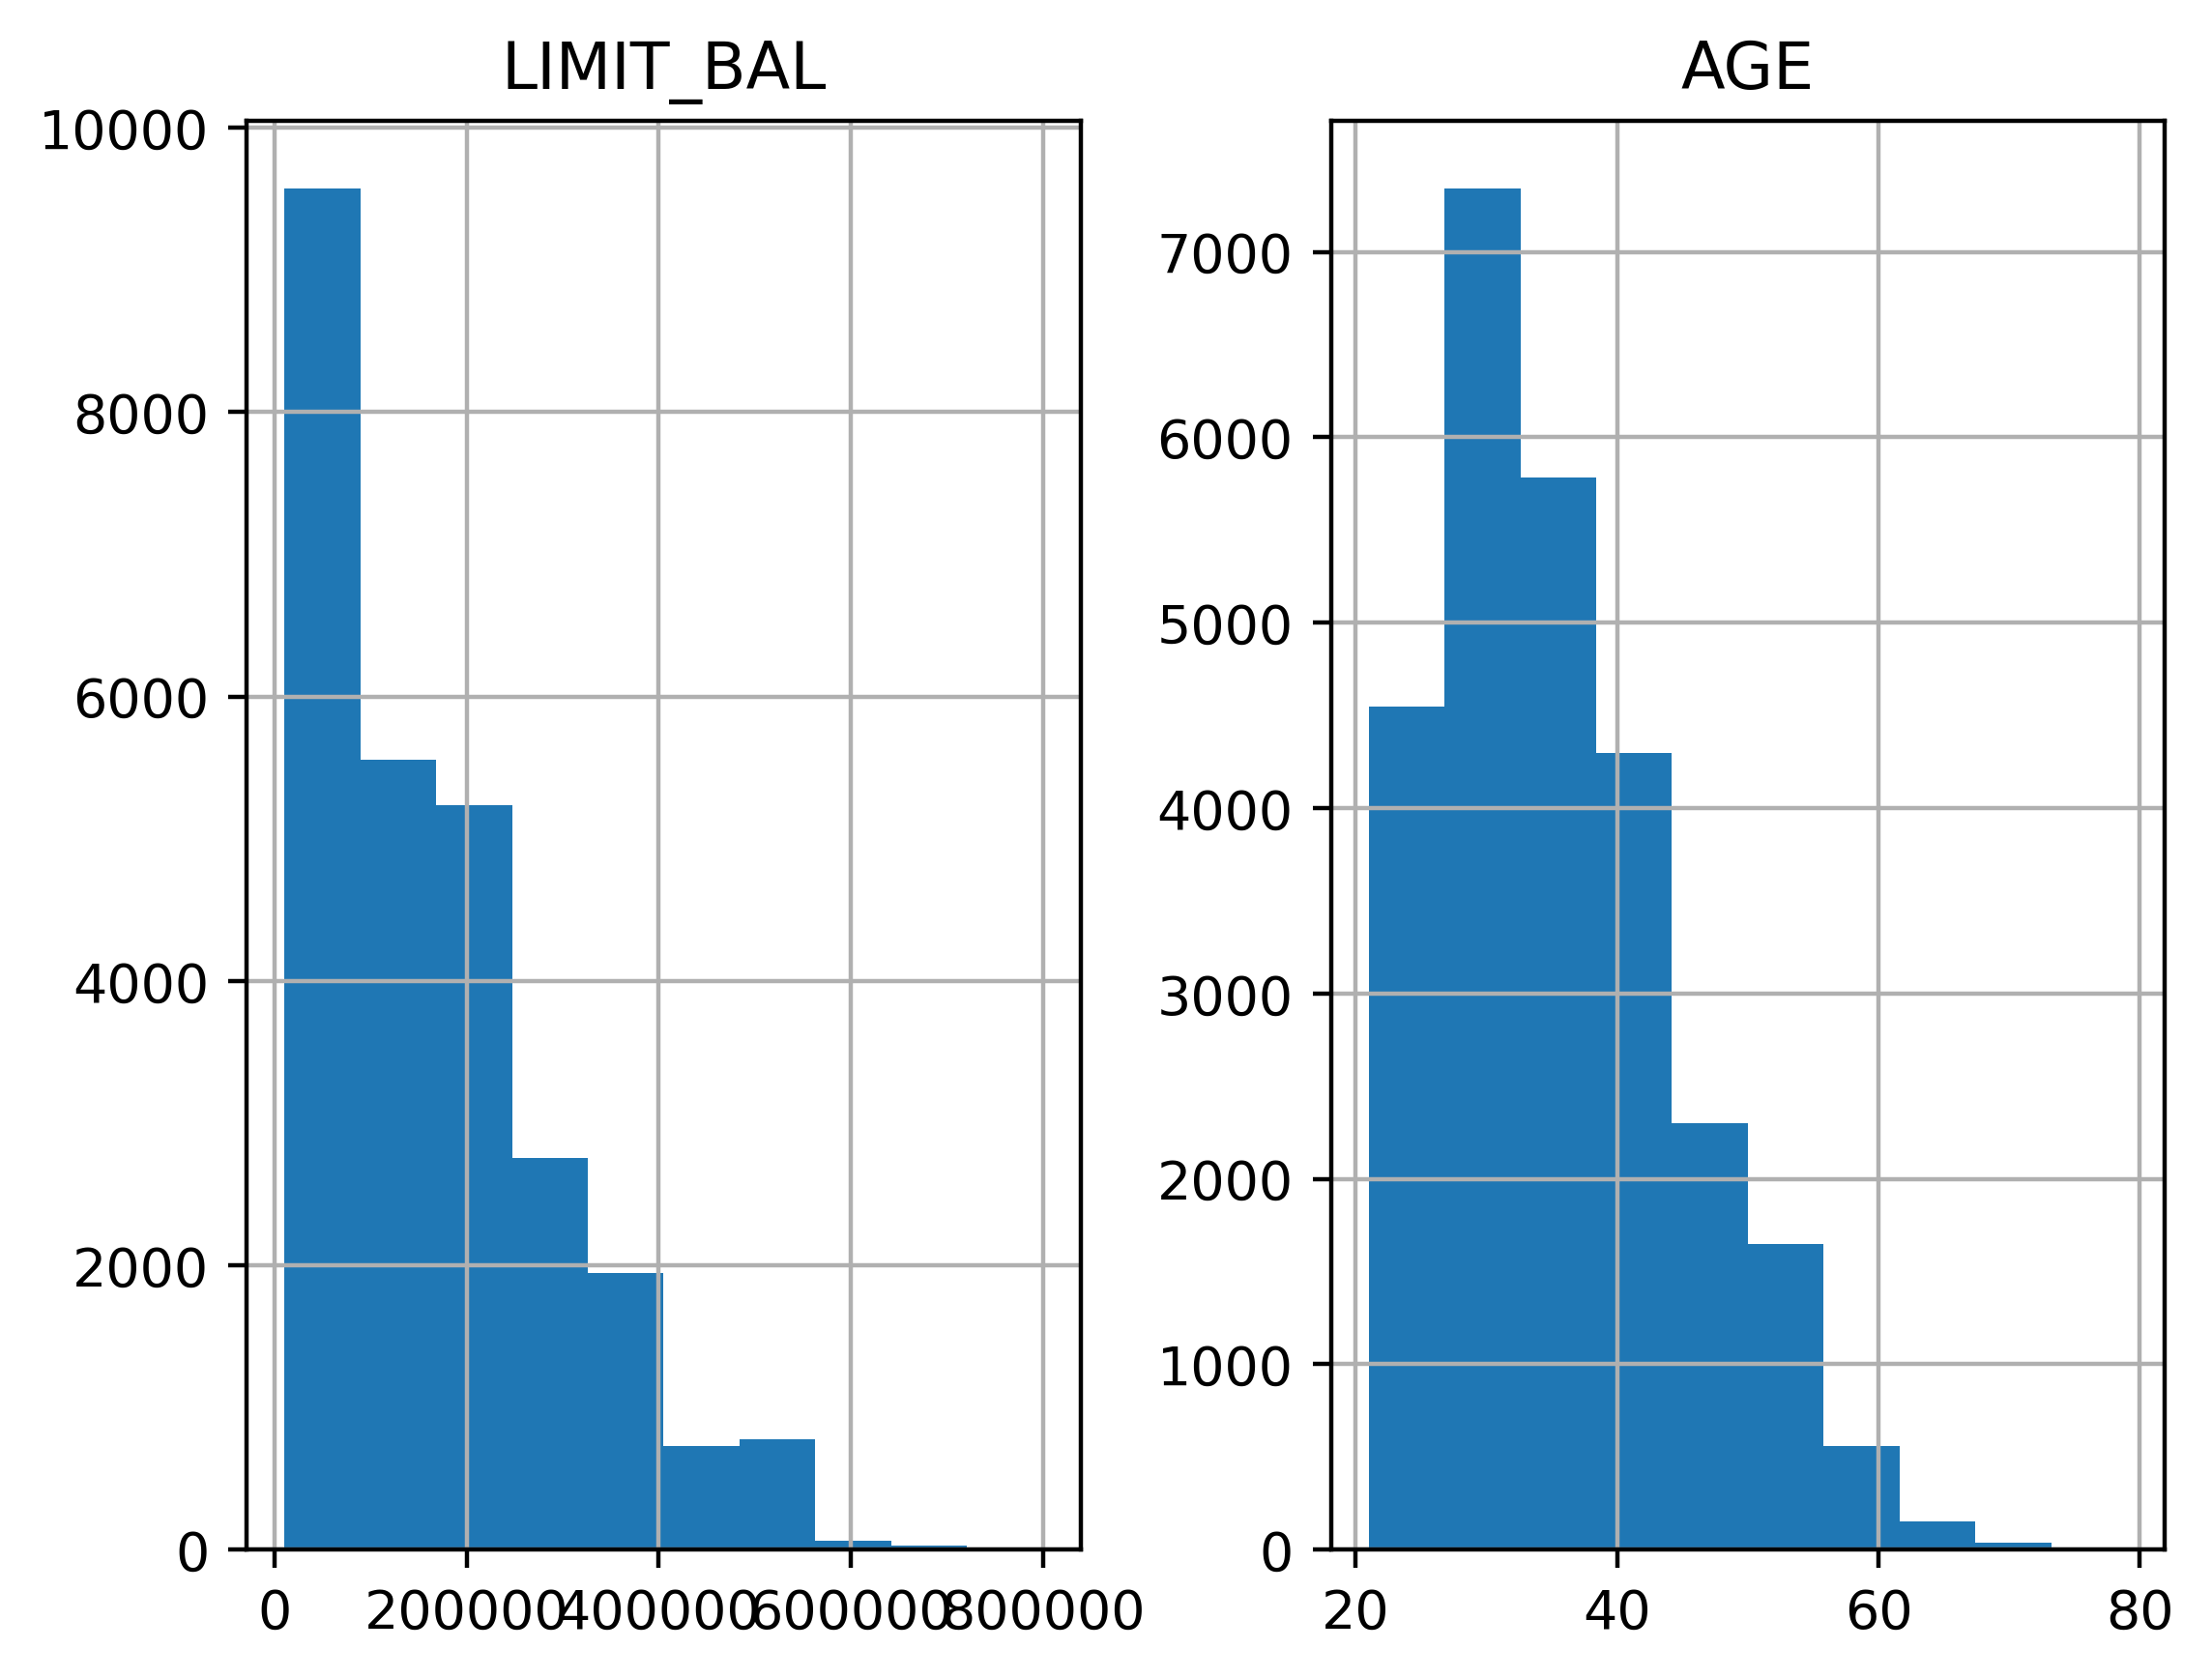

In [29]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [30]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [31]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

### Realizando a junção dos dados dos itens 0, 5 e 6 dentro do item 4:

In [32]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

### Realizando a junção dos dados de alguns itens dentro da coluna 'MARRIAGE':

In [33]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [34]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

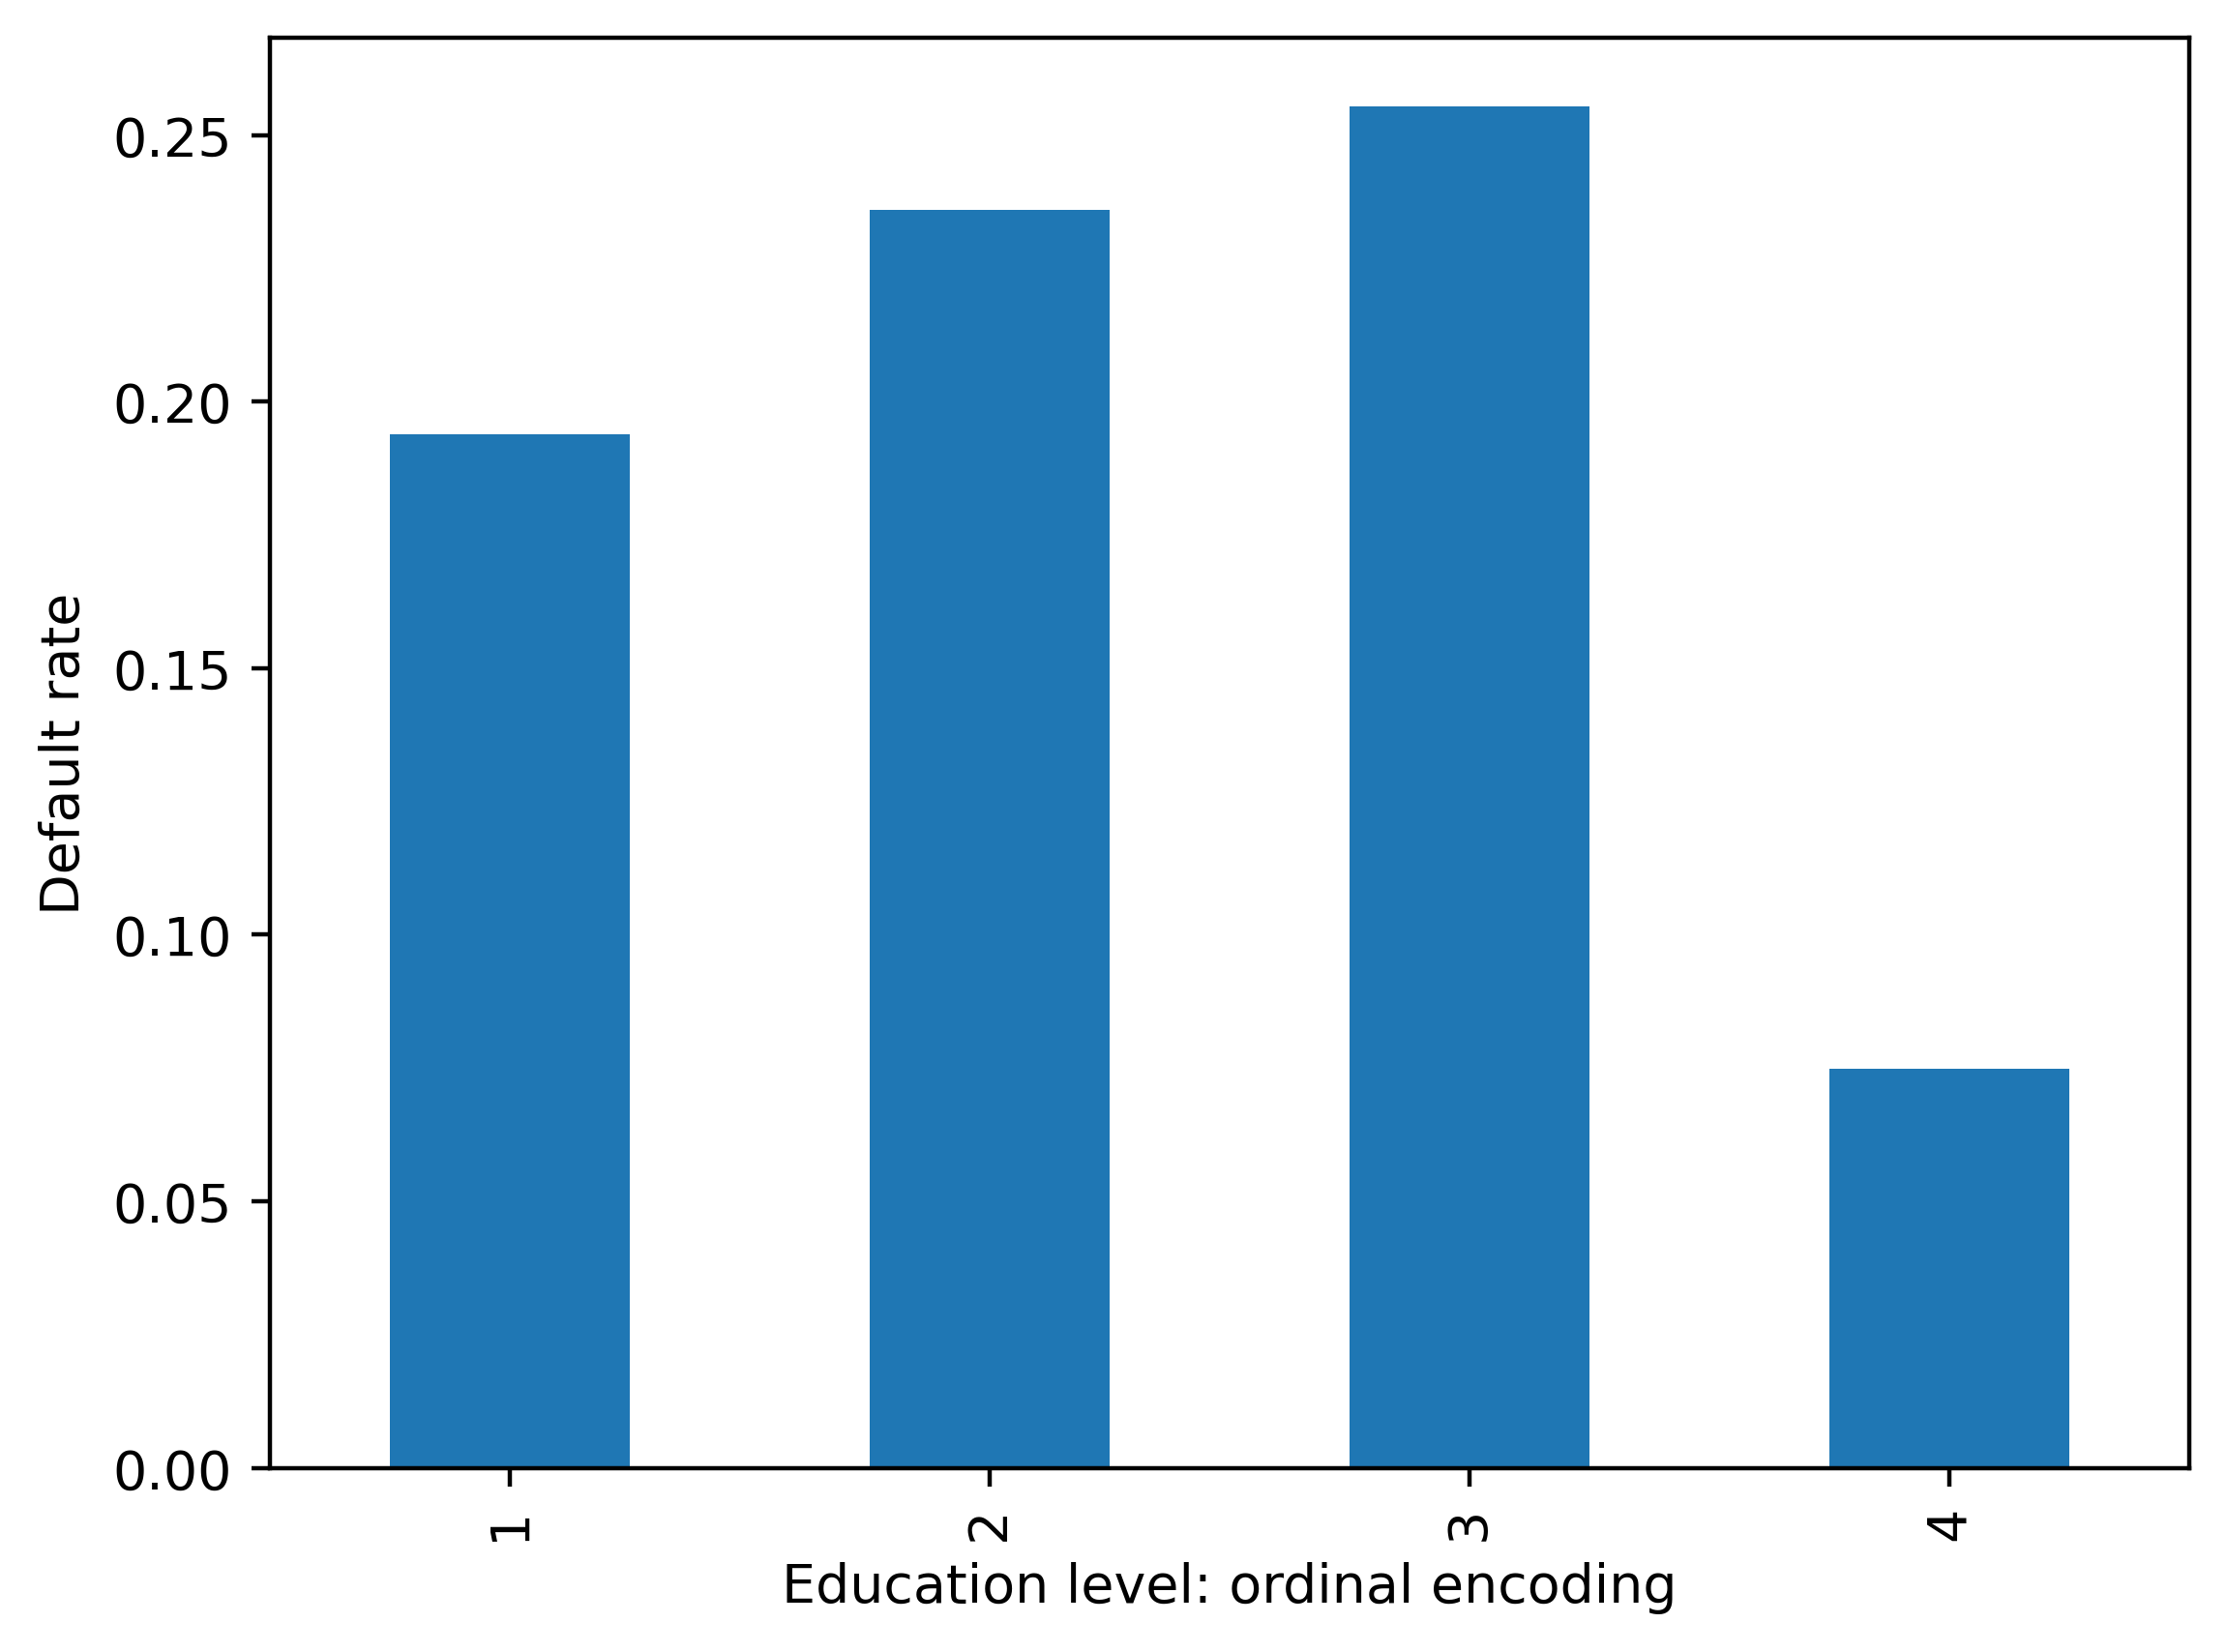

In [35]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month' : 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [38]:
df_clean_2['EDUCATION_CAT'] = 'none'

#### Criando uma coluna para distruibir as categorias da variável Education:

In [39]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [40]:
cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}

In [41]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


#### Transformando a variável categórica Education em dummies:

In [42]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


#### Concatenando os dataframes:

In [44]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


#### Salvando o Dataframe:

In [48]:
df_with_ohe.to_csv('../Capítulo 01/data/Chapter_1_cleaned_data.csv', index=False)

### Explorando as Características de Histórico Financeiro do Dataset:

####  Carregando o dataset salvo anteriormente:

In [49]:
df = pd.read_csv('../Capítulo 01/data/Chapter_1_cleaned_data.csv')

In [50]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [53]:
df.shape

(26664, 30)

In [52]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

#### Criando uma lista para analisar o status dos pagamento:

In [58]:
pay_feats = ['PAY_1',
            'PAY_2', 
            'PAY_3', 
            'PAY_4', 
            'PAY_5', 
            'PAY_6']

In [61]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [64]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot: >

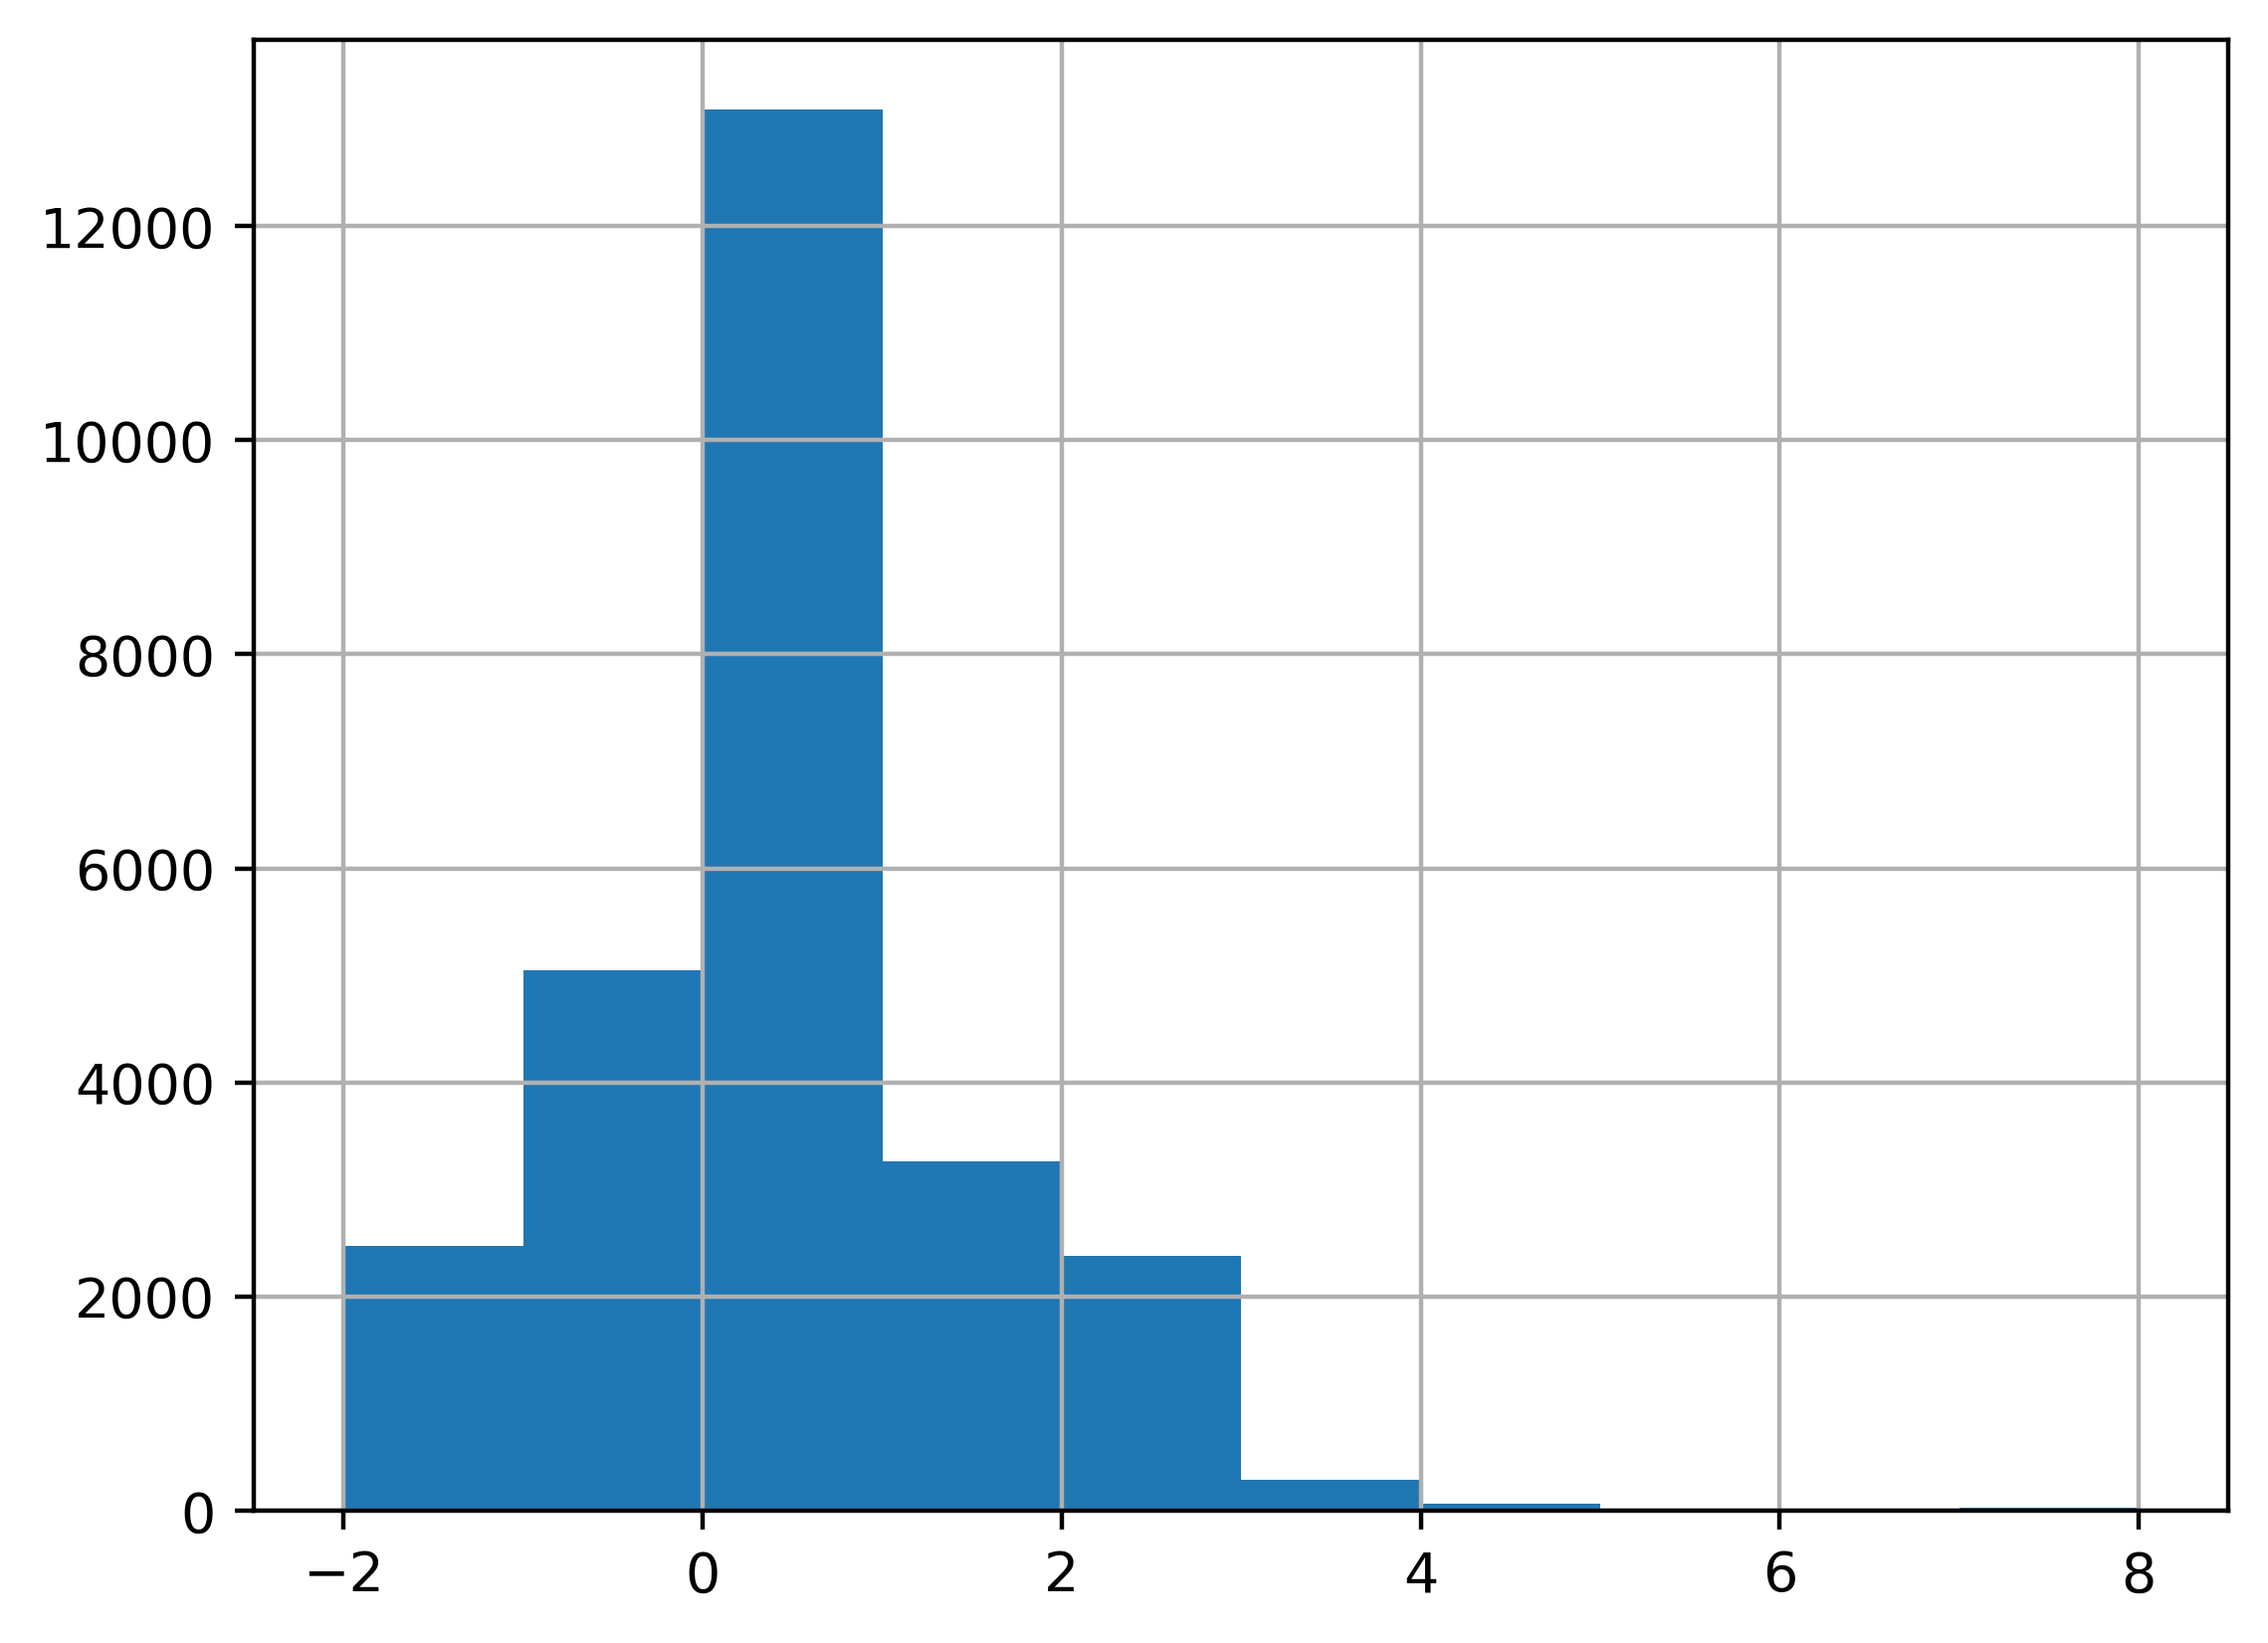

In [65]:
df[pay_feats[0]].hist()

#### Alterando o número de bins:

In [66]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

#### Inserindo labels no gráfico:

Text(0, 0.5, 'Number of accounts')

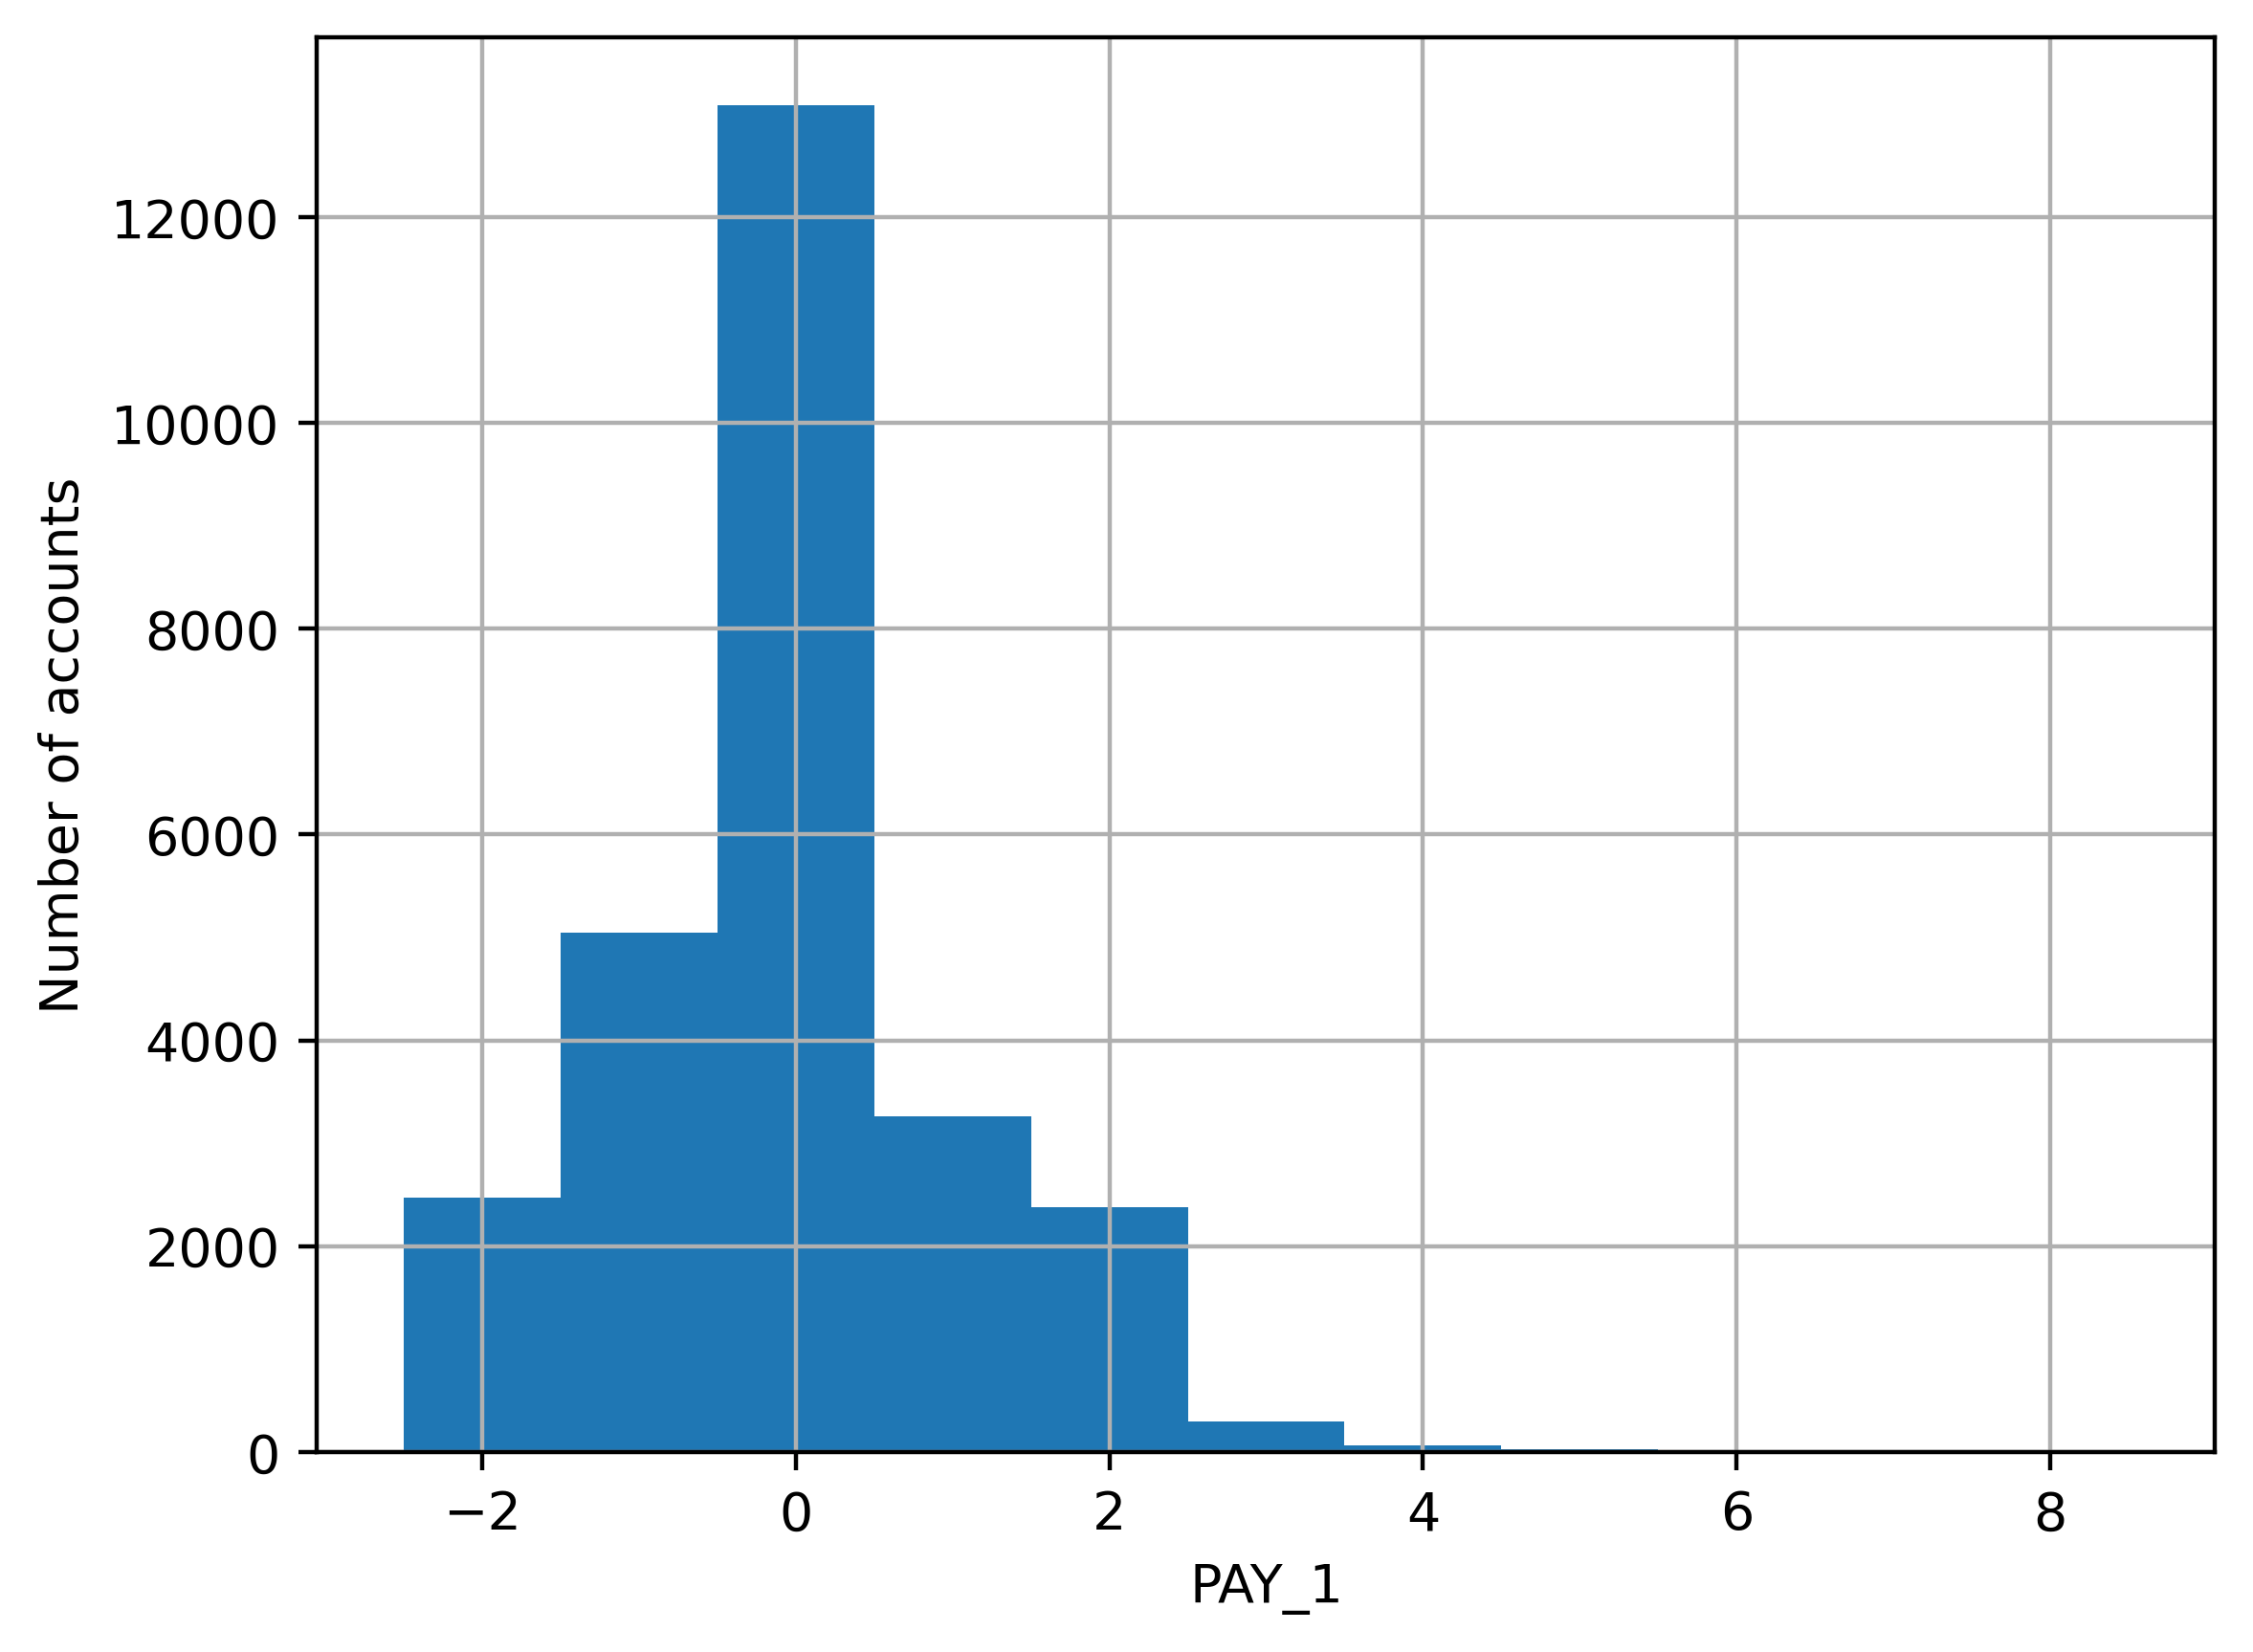

In [67]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

#### Plotando os últimos 6 meses, com redução da fonte utilizada:

array([[<AxesSubplot: title={'center': 'PAY_1'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>],
       [<AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>,
        <AxesSubplot: title={'center': 'PAY_6'}>]], dtype=object)

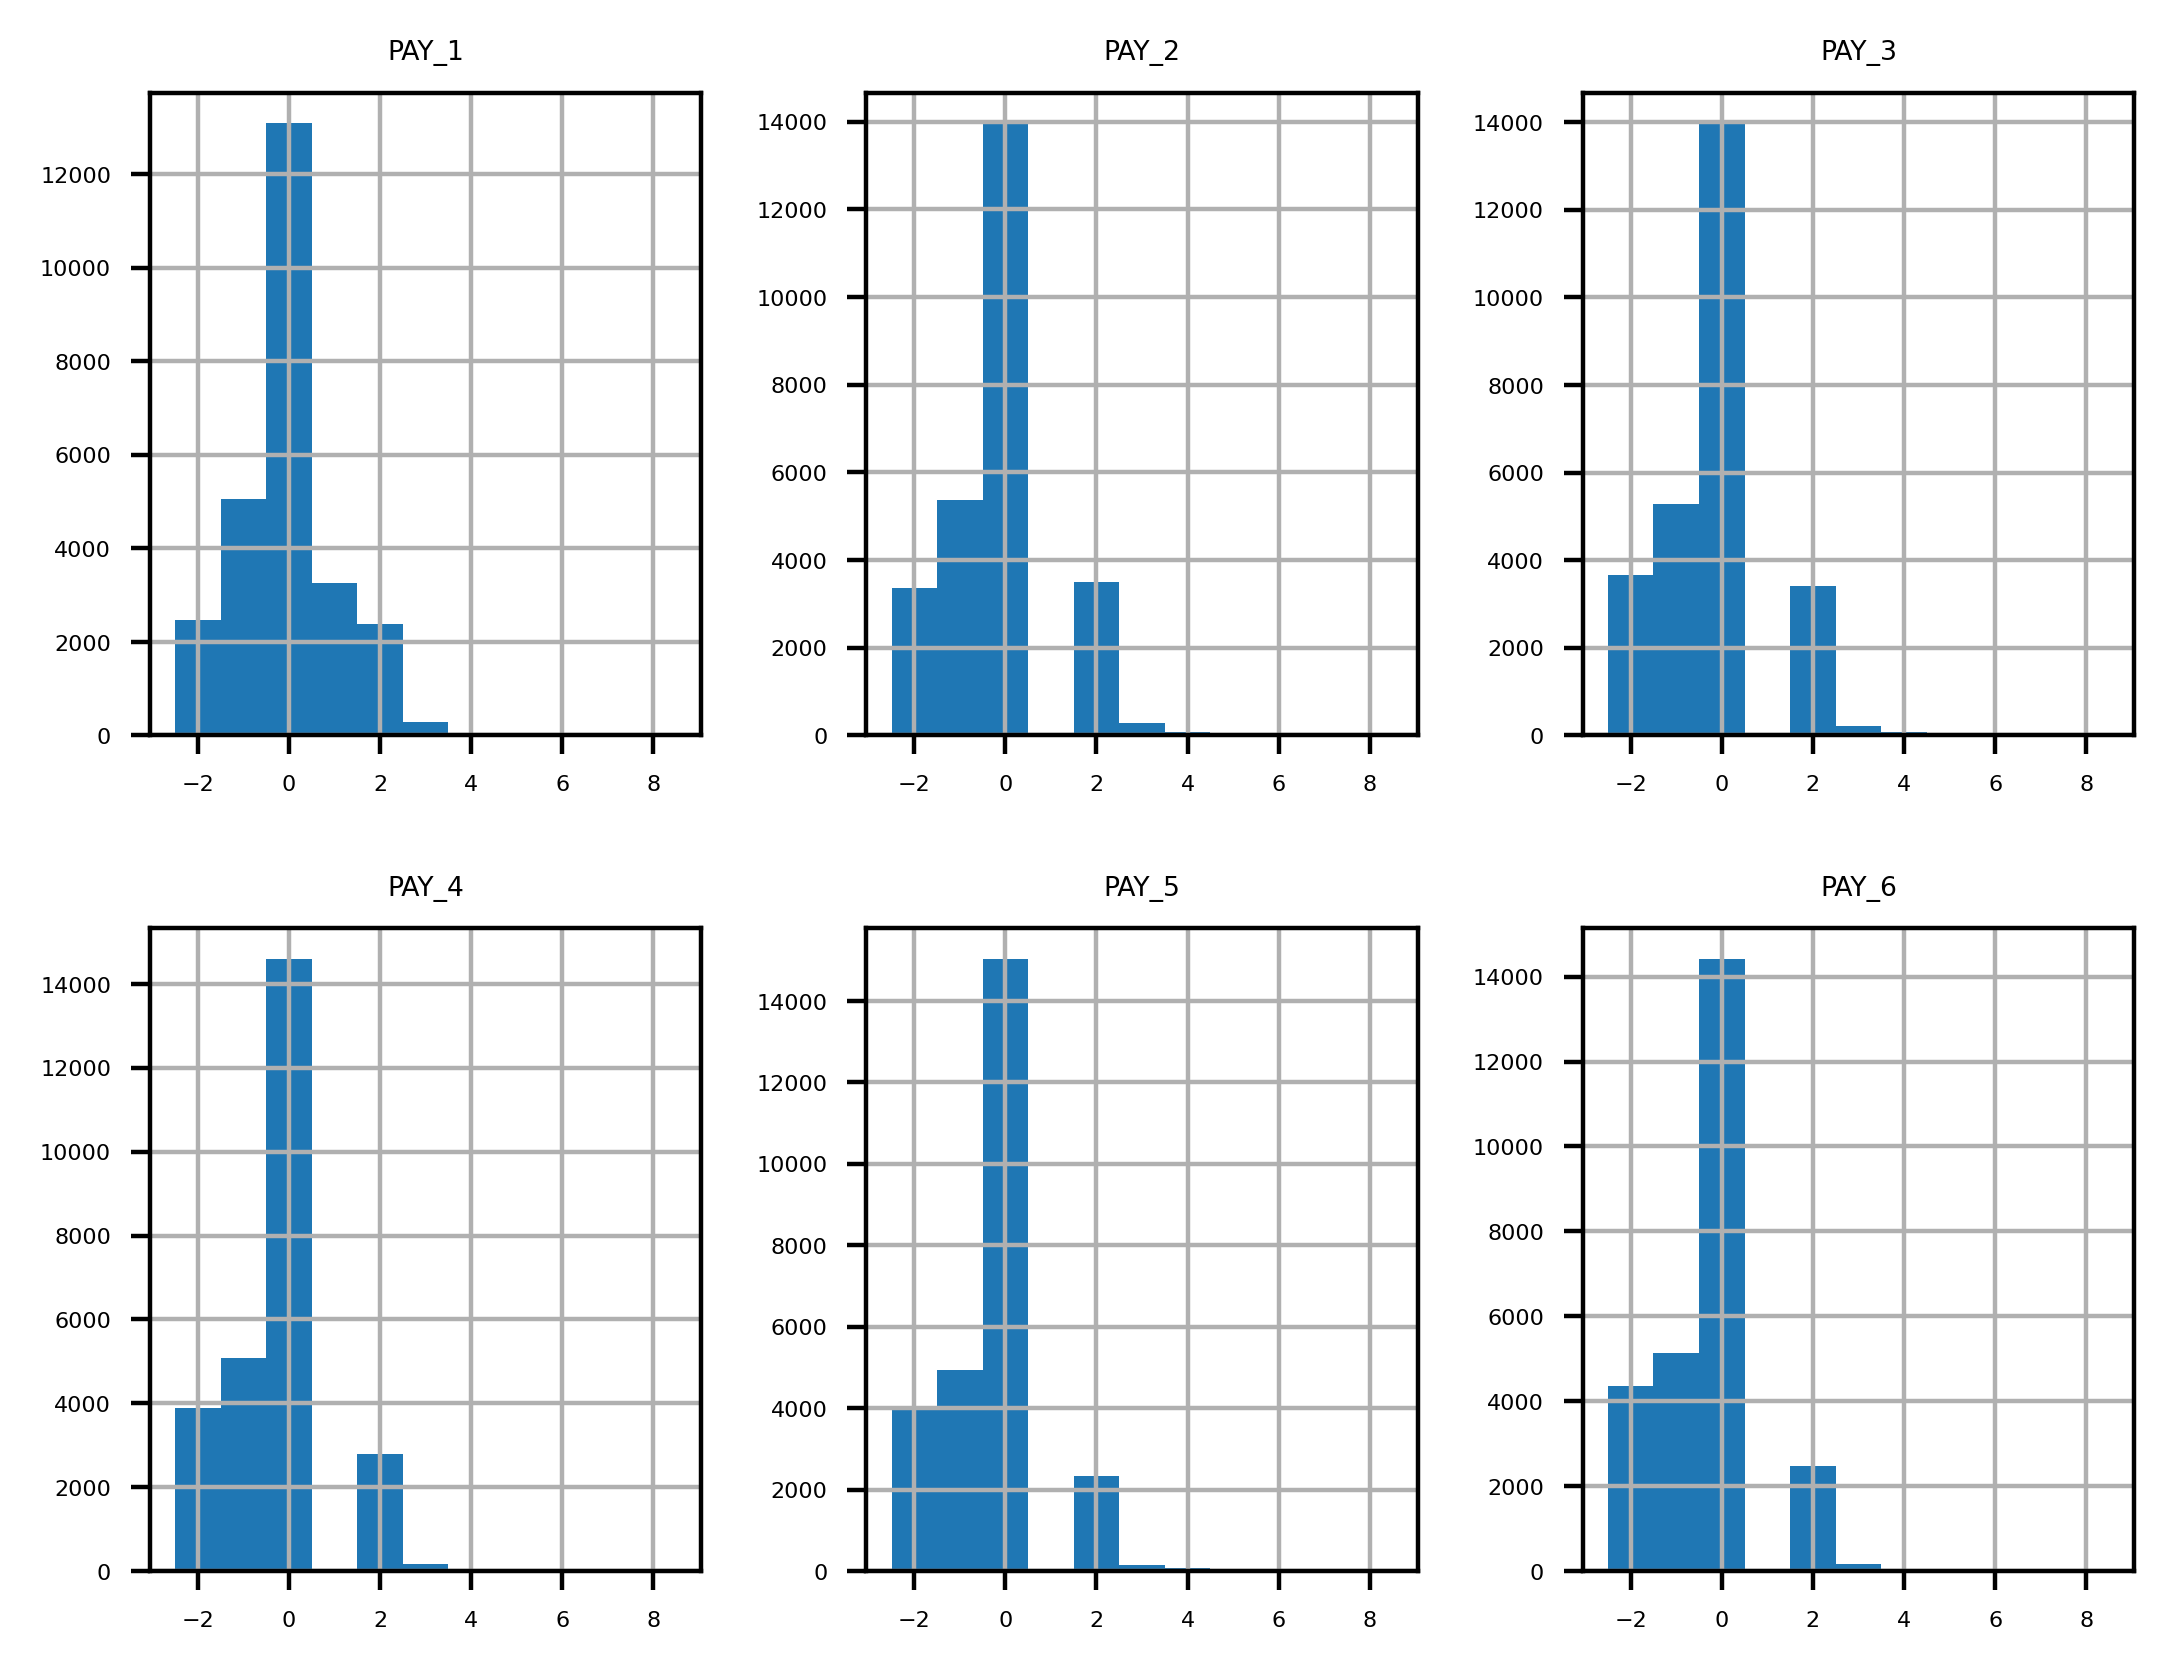

In [70]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

#### Verificando o status de pagamento no Pay 2 e Pay 3:

In [71]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


##### Conforme analisado, o dataset apresenta um problema com os valores referentes ao mês de julho (PAY_3). Como que alguns clientes estão a dois meses com contas atrasadas em agosto e em julho os clientes não mostram nem um mês em atraso? Descobriu-se que o banco de dados estava corrompido por problemas na obtenção de dados dos clientes. Apenas o mês de setembro (PAY_1) é confiável.

### Aplicando as funções logarítmas no dataset com o apply:

####  Análise da variável Bill_AMT:

In [76]:
bill_feats = ['BILL_AMT1', 
              'BILL_AMT2',
              'BILL_AMT3', 
              'BILL_AMT4', 
              'BILL_AMT5', 
              'BILL_AMT6']

In [77]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot: title={'center': 'BILL_AMT1'}>,
        <AxesSubplot: title={'center': 'BILL_AMT2'}>,
        <AxesSubplot: title={'center': 'BILL_AMT3'}>],
       [<AxesSubplot: title={'center': 'BILL_AMT4'}>,
        <AxesSubplot: title={'center': 'BILL_AMT5'}>,
        <AxesSubplot: title={'center': 'BILL_AMT6'}>]], dtype=object)

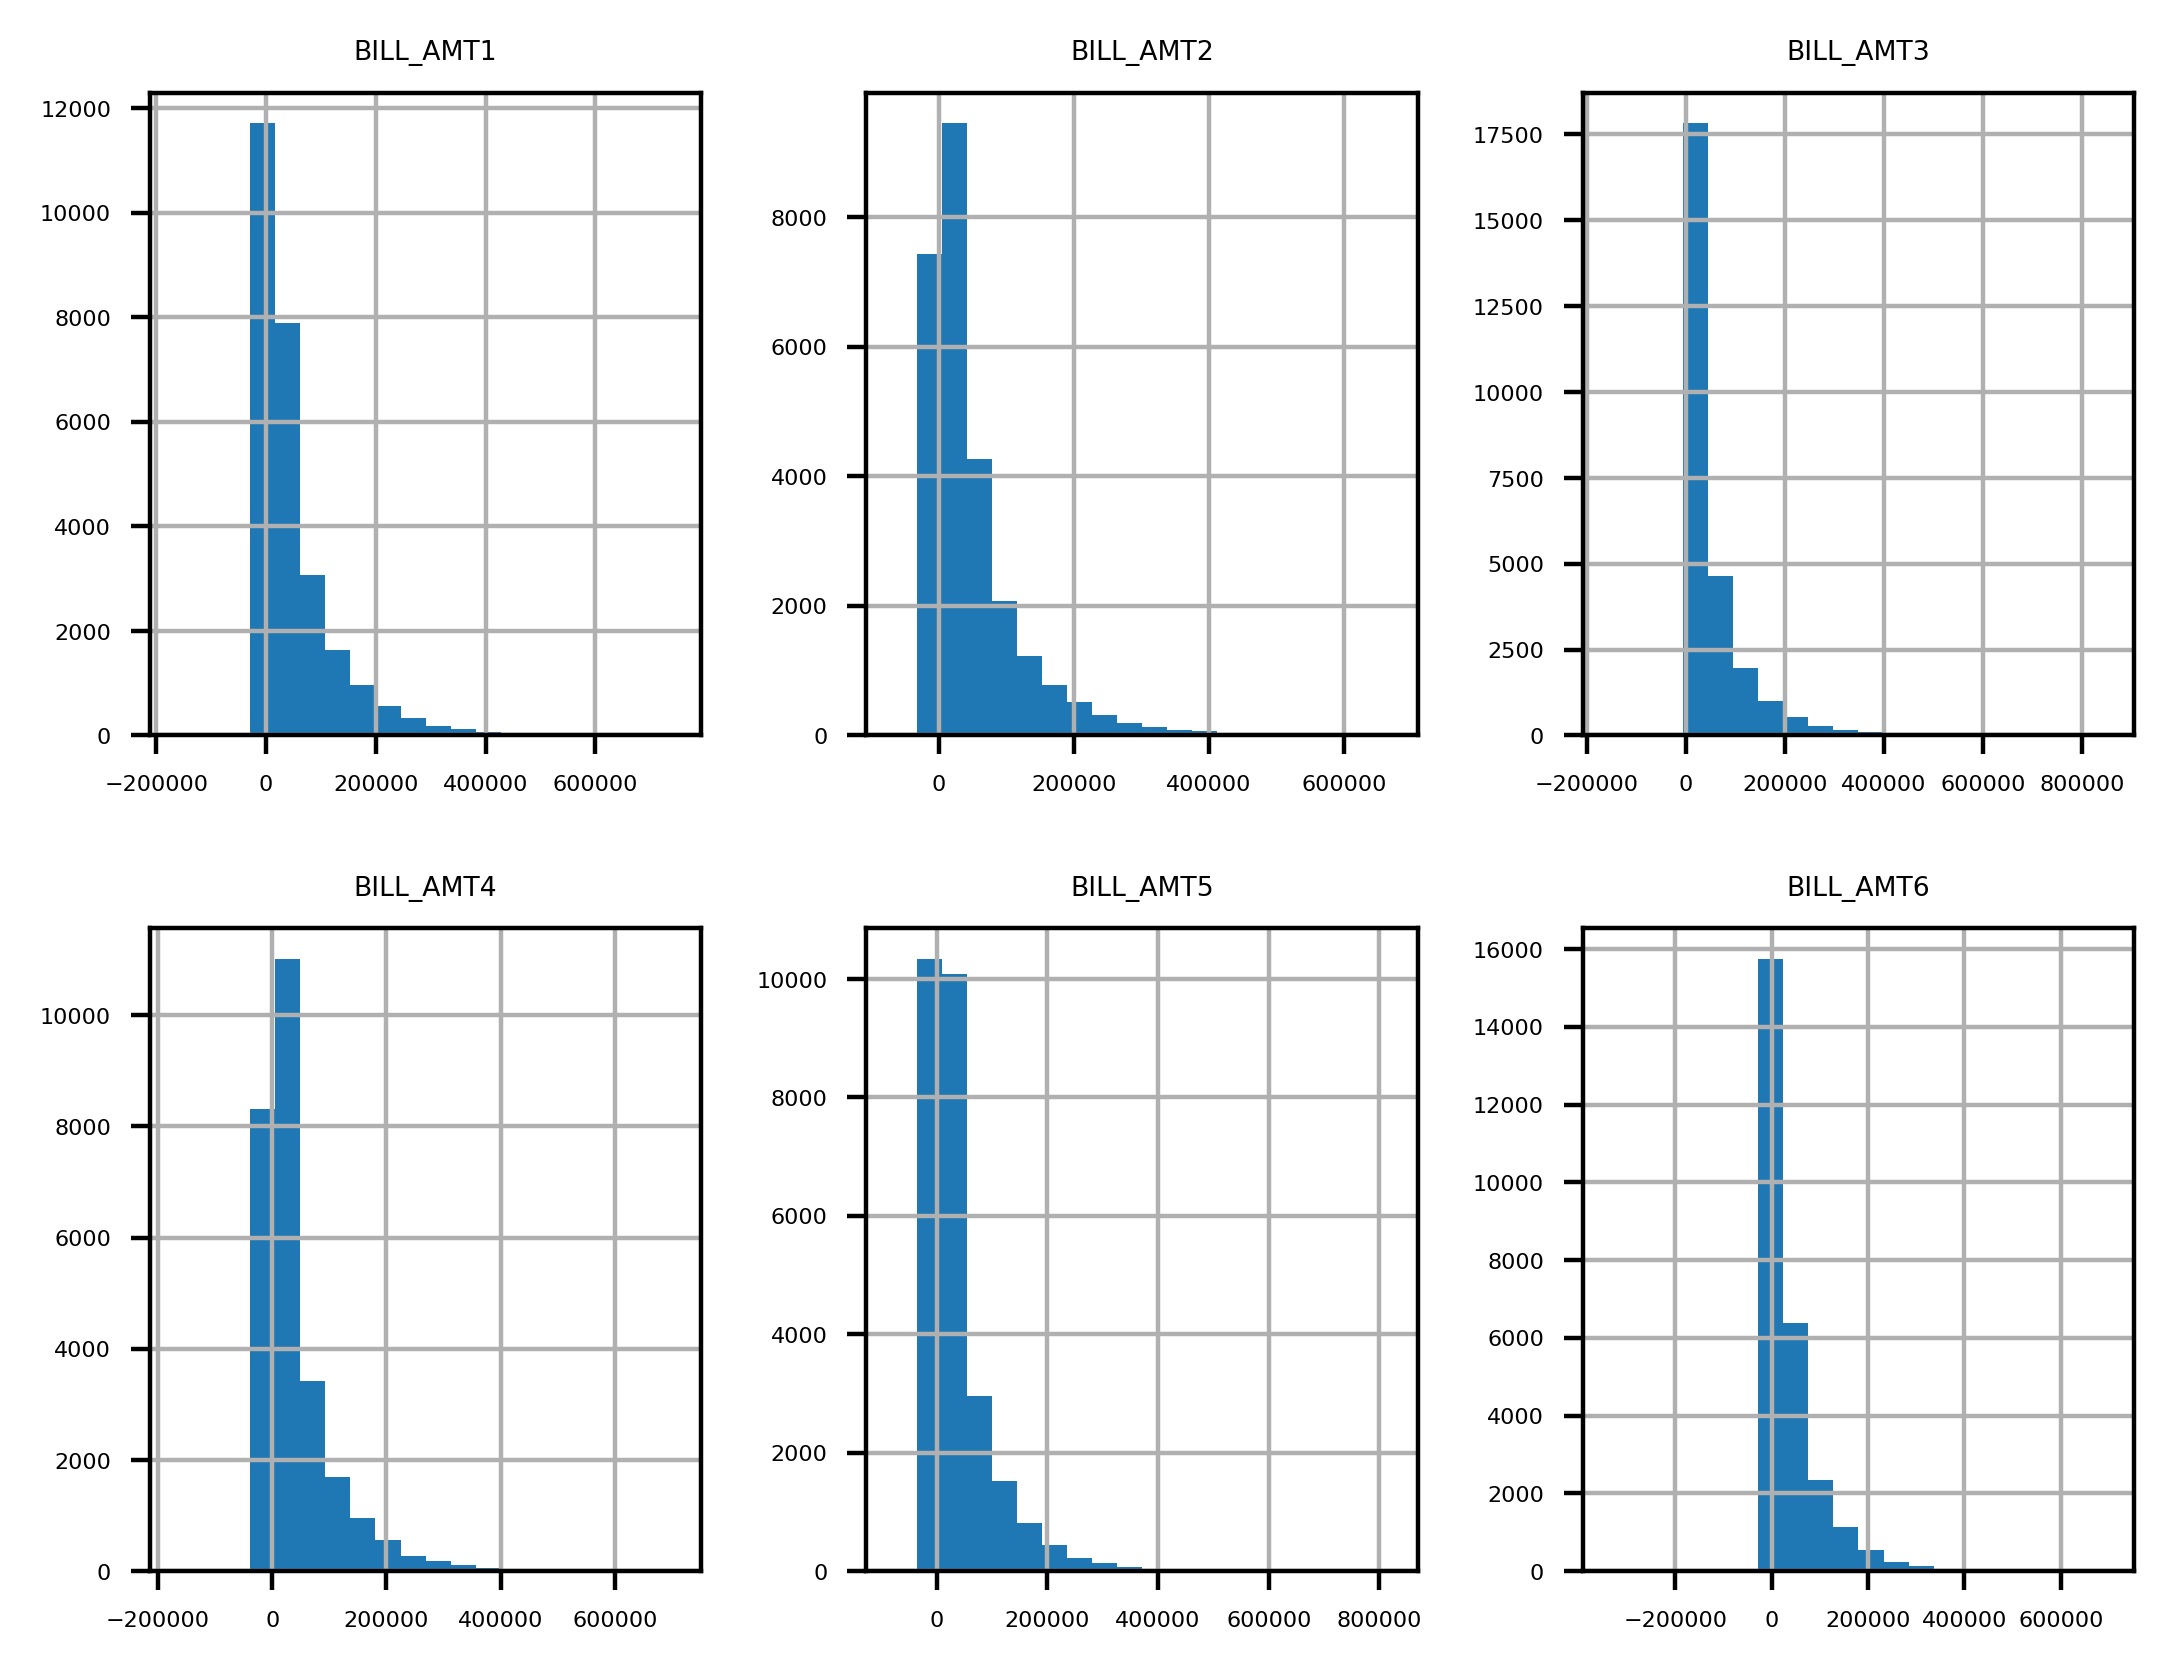

In [78]:
df[bill_feats].hist(bins=20, layout=(2,3))

#### Análise da variável PAY_AMT:

In [72]:
payamt_feats = ['PAY_AMT1',
                'PAY_AMT2', 
                'PAY_AMT3', 
                'PAY_AMT4', 
                'PAY_AMT5', 
                'PAY_AMT6']

In [74]:
df[payamt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [75]:
df[payamt_feats[0]].value_counts().sort_index()

0         4656
1            8
2           13
3           15
4           16
          ... 
405016       1
423903       1
493358       1
505000       1
873552       1
Name: PAY_AMT1, Length: 7425, dtype: int64

array([[<AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <AxesSubplot: title={'center': 'PAY_AMT3'}>],
       [<AxesSubplot: title={'center': 'PAY_AMT4'}>,
        <AxesSubplot: title={'center': 'PAY_AMT5'}>,
        <AxesSubplot: title={'center': 'PAY_AMT6'}>]], dtype=object)

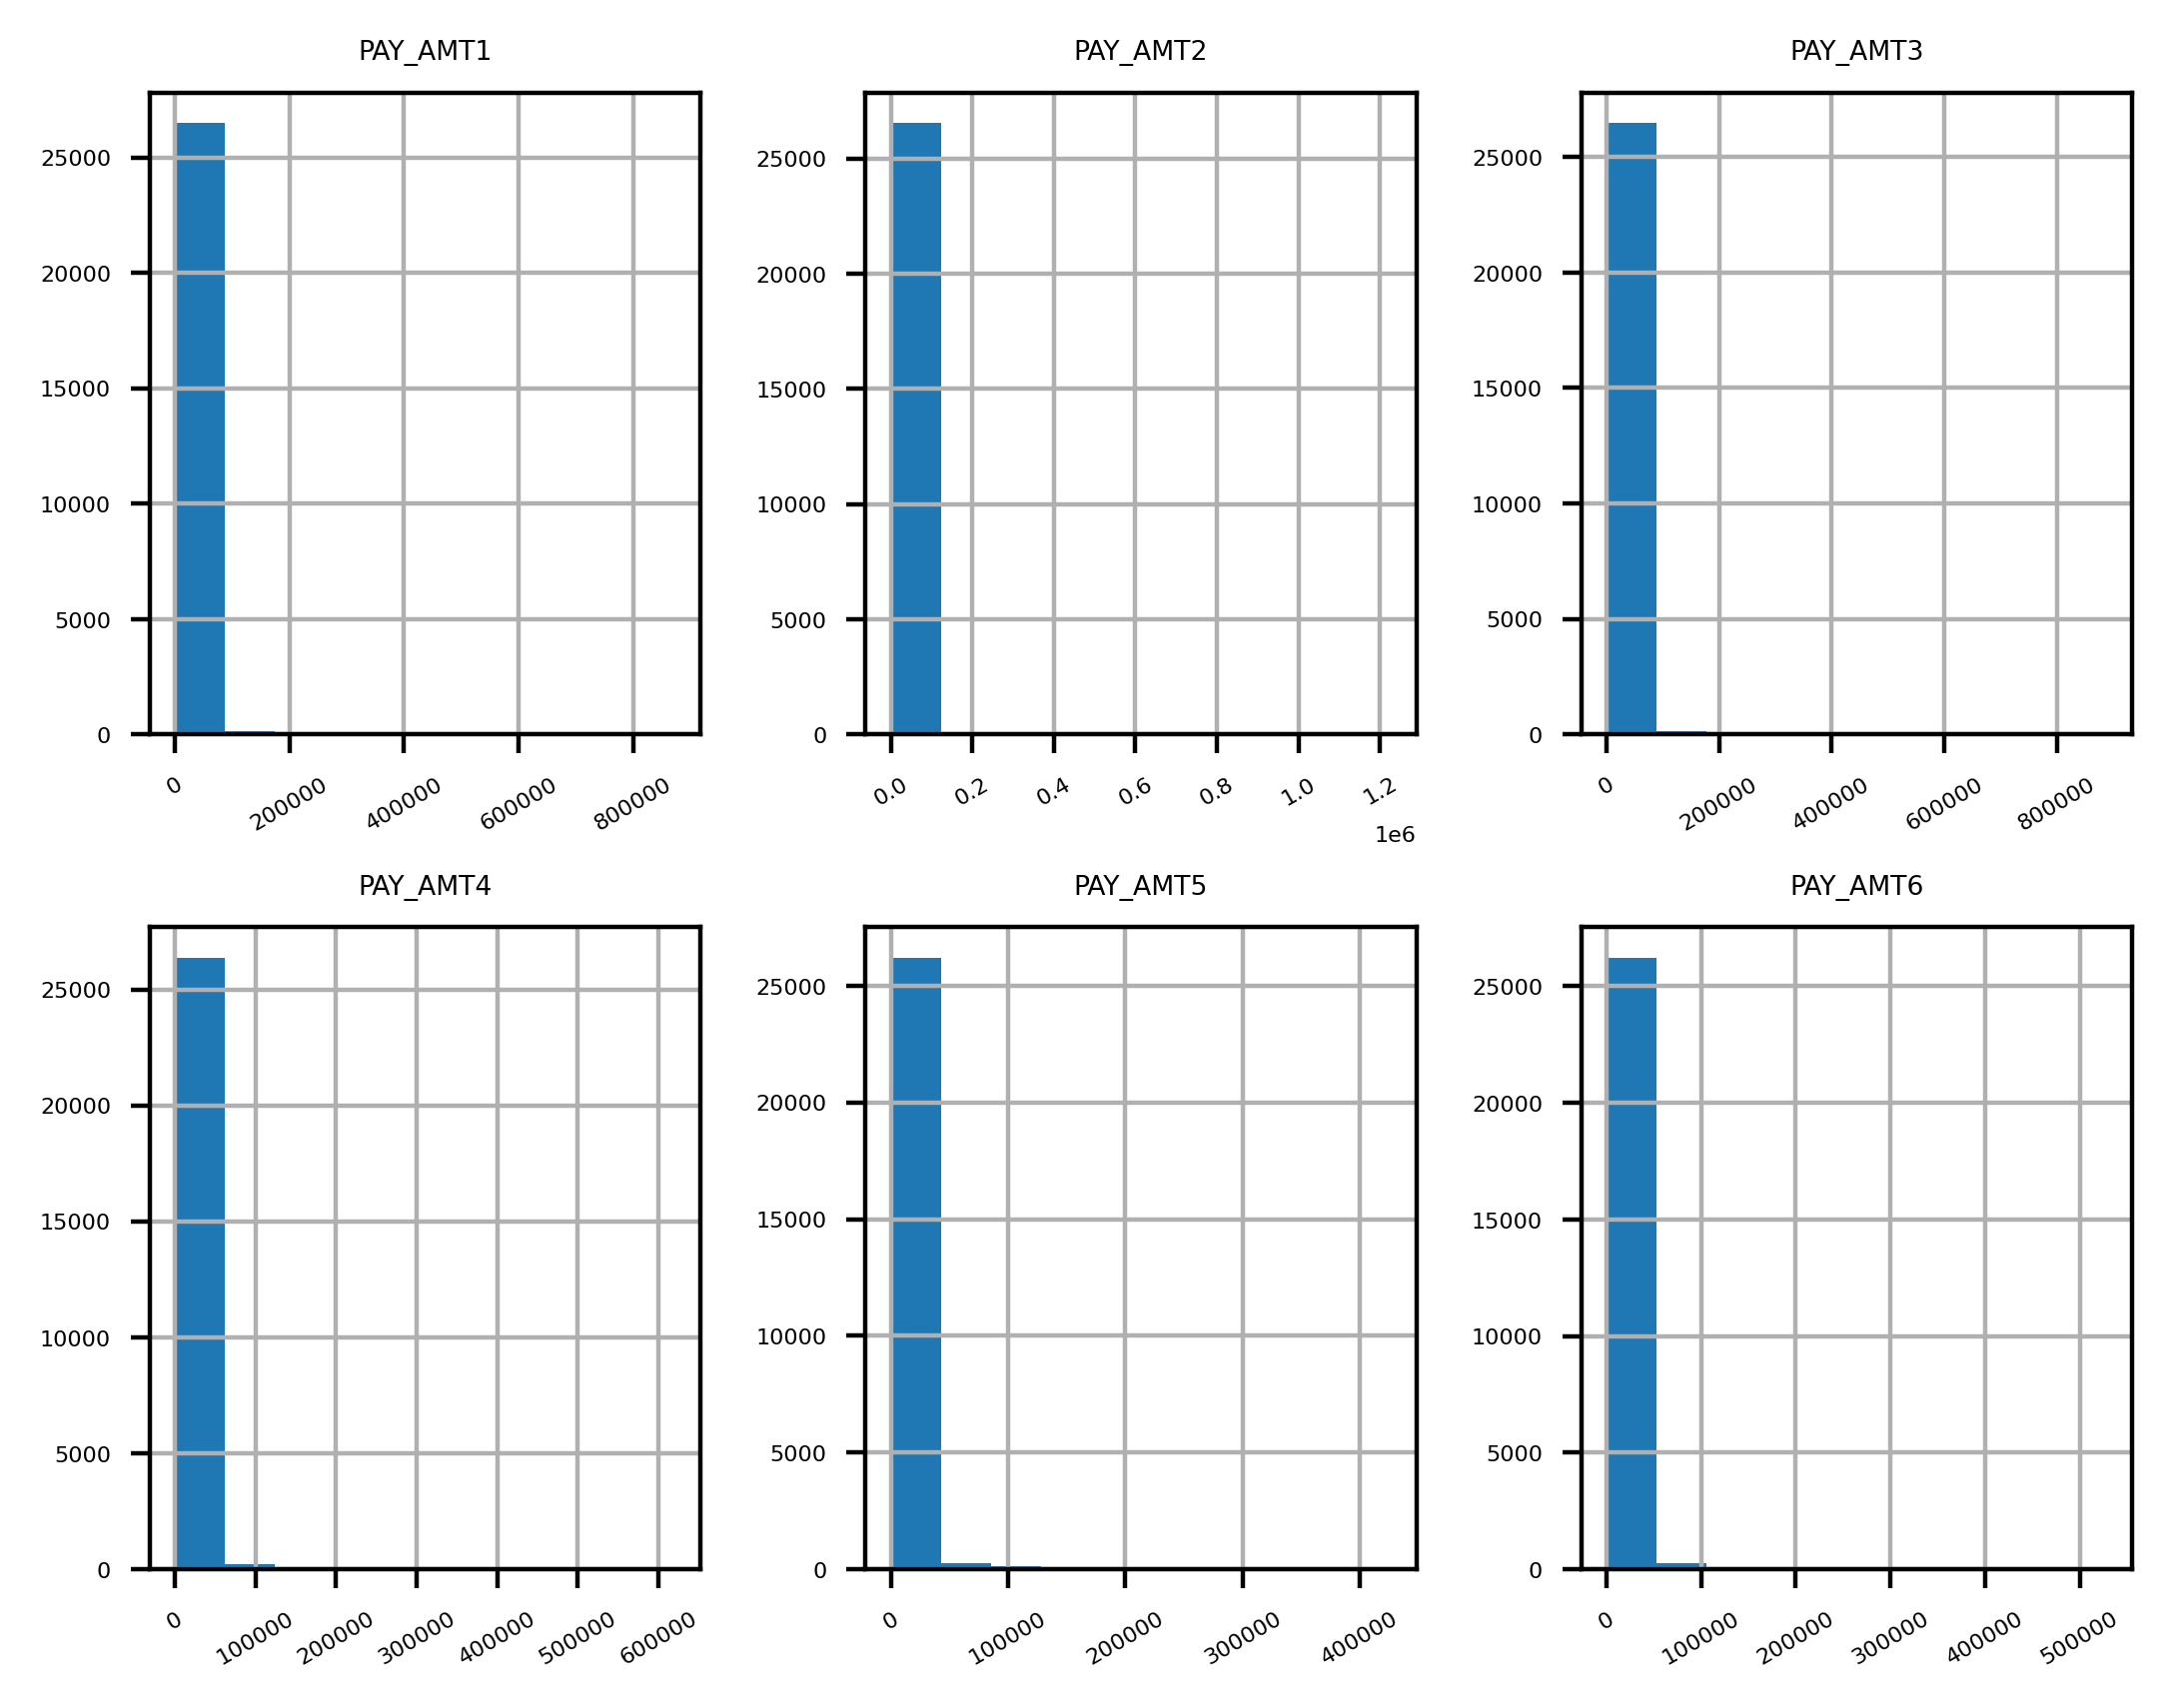

In [80]:
df[payamt_feats].hist(layout=(2,3), xrot=30)

#### O gráfico se apresenta pouco informativo, logo aplicaremos uma transformação logarítmica para melhorar a visualização dos dados:

In [82]:
pay_zero_mask = df[payamt_feats] == 0
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot: title={'center': 'PAY_AMT1'}>,
        <AxesSubplot: title={'center': 'PAY_AMT2'}>,
        <AxesSubplot: title={'center': 'PAY_AMT3'}>],
       [<AxesSubplot: title={'center': 'PAY_AMT4'}>,
        <AxesSubplot: title={'center': 'PAY_AMT5'}>,
        <AxesSubplot: title={'center': 'PAY_AMT6'}>]], dtype=object)

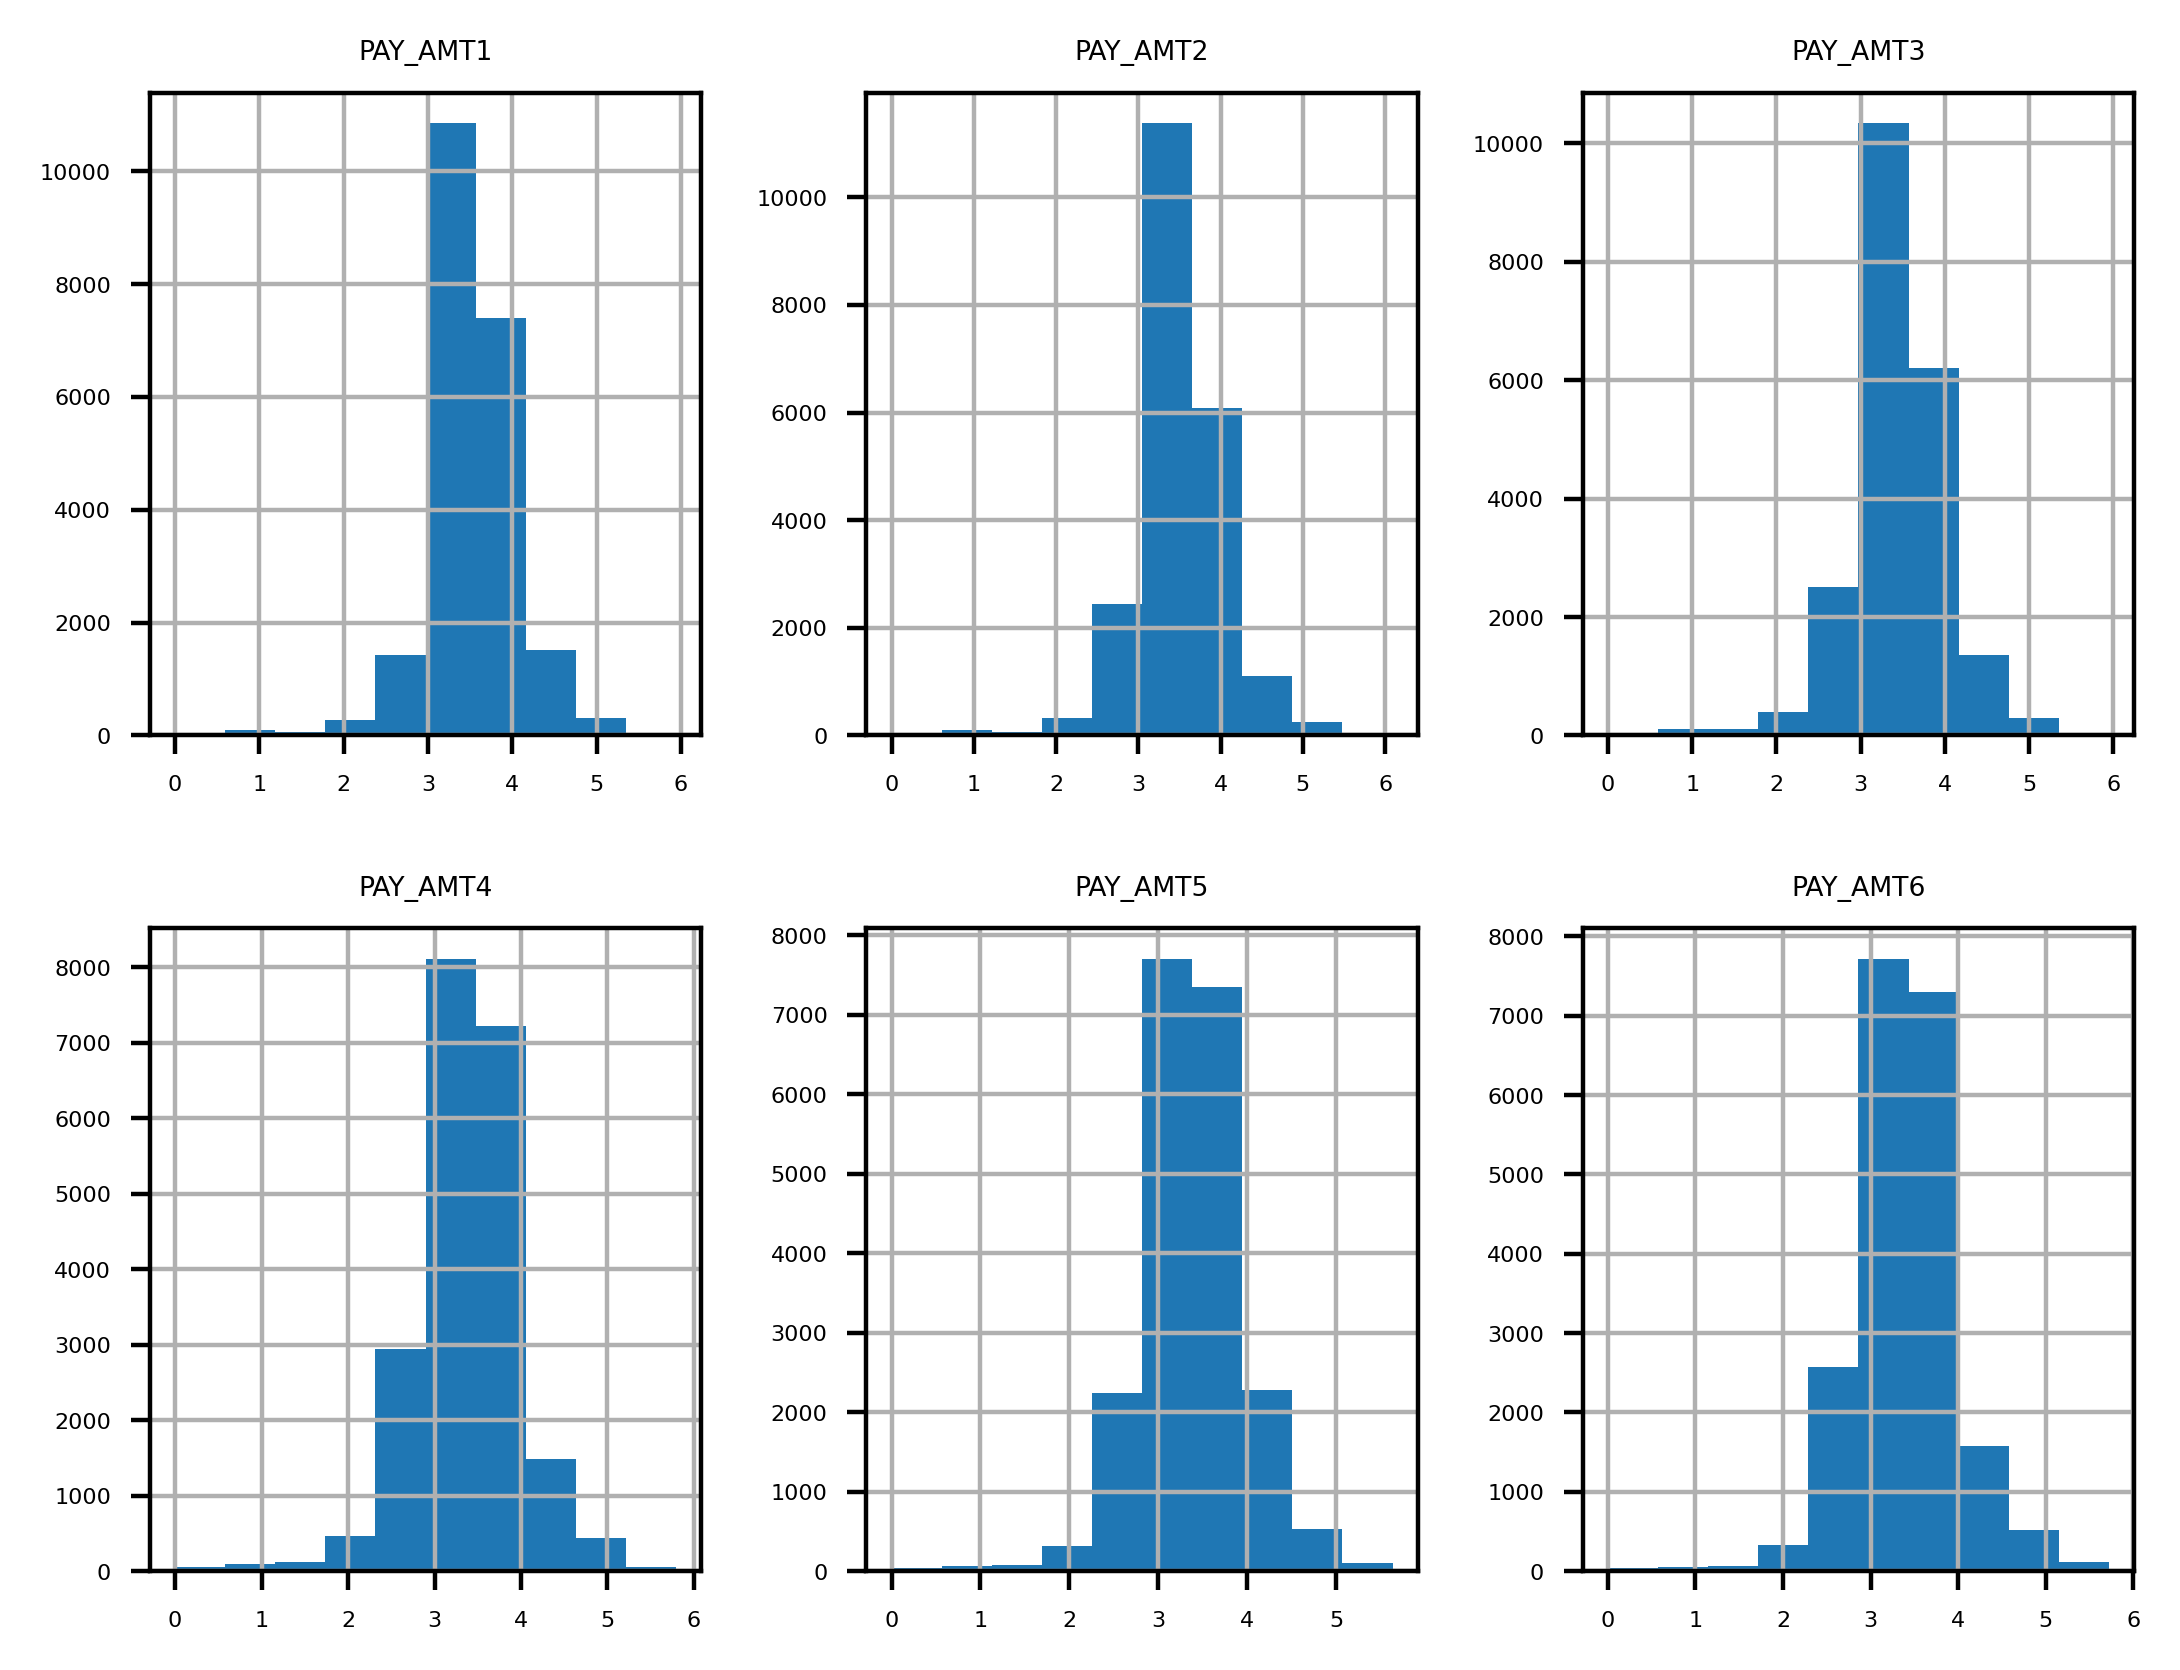

In [83]:
df[payamt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))